## Завдання:

З бібліотеки датасетів **Tensorflow** за допомогою функції **tfds.load** завантажте датасет під назвою “cars196”. Застосуйте до зображення із цього датасету аугментаційні перетворення:

- дзеркальне відображення
- зміна насиченості кольорів
- відображення в grayscale
- поворот на 90 градусів
- обрізка по краях
- зміна яскравості


## Розв'язок

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Завантажуємо датасет cats_vs_dogs так як датасет cars196 was not found on this server.
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [3]:
# Функція для отримання назви категорії
get_label_name = metadata.features['label'].int2str

In [4]:
# Зображення по номеру
n=16
for i, (image, label) in enumerate(test_ds):
  if i== n-1:
    break

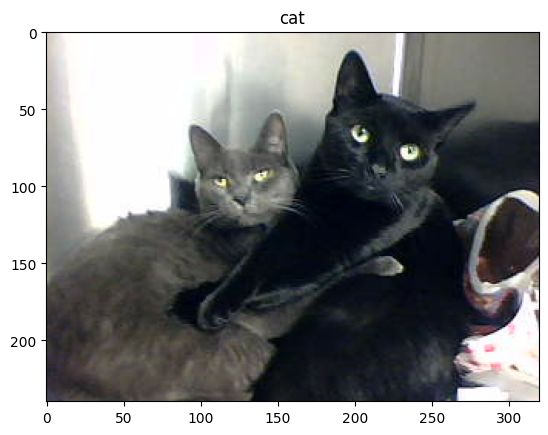

In [5]:
#image, label = next(iter(test_ds))
plt.imshow(image)
plt.title(get_label_name(label));

In [6]:
# Функція для відображення оригінального і зміненого зображення 
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")
 
    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    plt.axis("off")

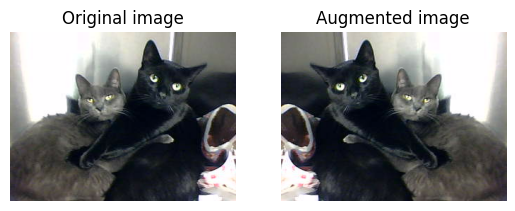

In [7]:
# Дзеркальне відображення
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

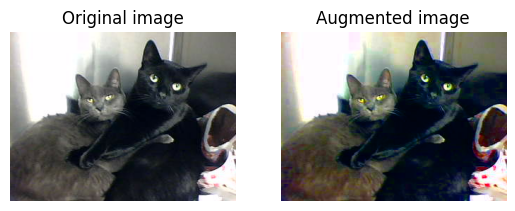

In [8]:
# Зміна насиченості кольорів
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

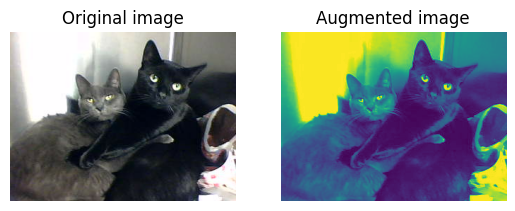

In [9]:
# Відображення в grayscale
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image,  tf.squeeze(grayscaled))

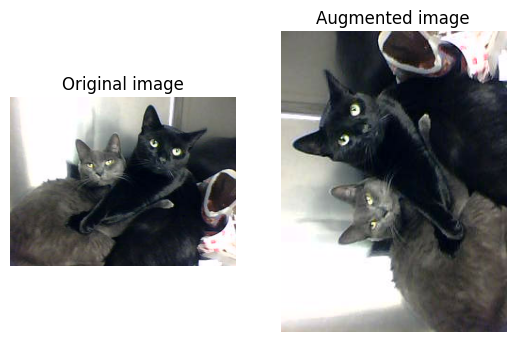

In [10]:
# Поворот на 90 градусів
rotated = tf.image.rot90(image)
visualize(image, rotated)

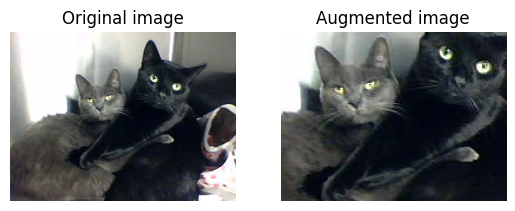

In [11]:
# Обрізання зображення
cropped = tf.image.central_crop(image, 
                                central_fraction=0.6)
visualize(image, cropped)

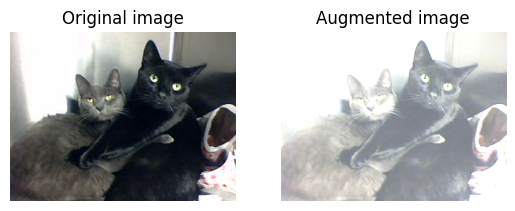

In [12]:
# Зміна яскравості
bright = tf.image.adjust_brightness(image, 0.5)
visualize(image, bright)

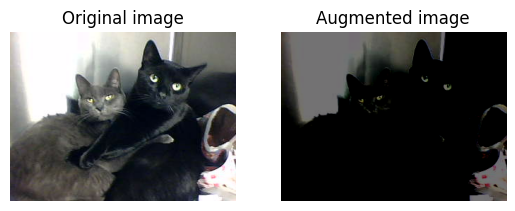

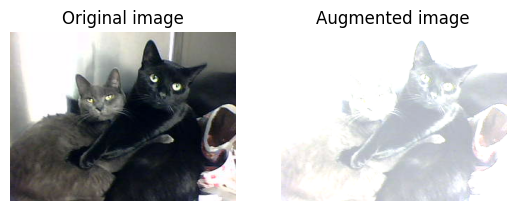

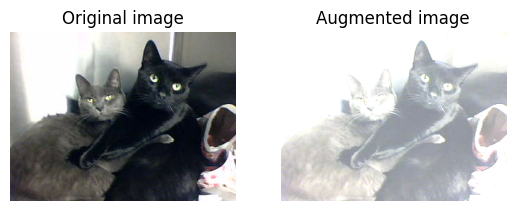

In [13]:
# Зміна яскравості за допомогою функції випадкової величини яскравості
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_brightness = tf.image.stateless_random_brightness(
      image, max_delta=0.95, seed=seed)
  visualize(image, stateless_random_brightness)